In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn import datasets
dataset = pd.read_csv('/home/inlab/Downloads/trainINLAB.csv')

X1_signal = dataset.iloc[:,[0,1]].values
X2_block = dataset.iloc[:,[3,4]].values
y = dataset.iloc[:, 5].values




Text(0, 0.5, 'Block Recieving time')

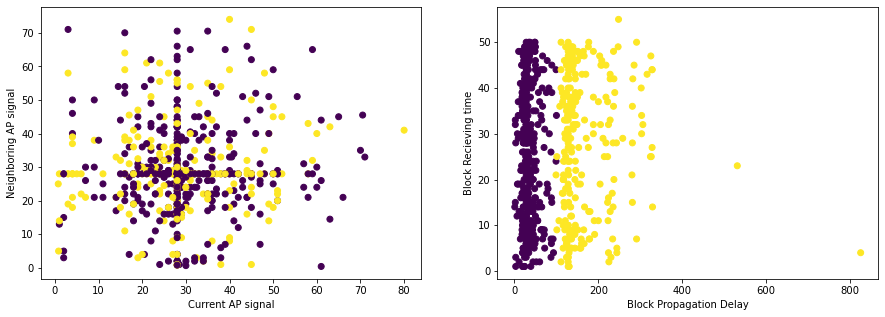

In [3]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(X1_signal[:, 0], X1_signal[:, 1], c=y)
plt.xlabel('Current AP signal')
plt.ylabel('Neighboring AP signal')

plt.subplot(1,2,2)
plt.scatter(X2_block[:, 0], X2_block[:, 1], c=y)
plt.xlabel('Block Propagation Delay')
plt.ylabel('Block Recieving time')

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    #Initialise the marker types and colors
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    color_Map = ListedColormap(colors[:len(np.unique(y))]) #we take the color mapping correspoding to the amount of classes in the target data
    
     # Parameters for the graph and decision surface
    x1_min = X[:,0].min() - 1
    x1_max = X[:,0].max() + 1
    x2_min = X[:,1].min() - 1
    x2_max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot samples
    X_test, Y_test = X[test_idx,:], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = color_Map(idx),
                    marker = markers[idx], label = cl
                   )
    

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#splitting

X_train_signal, X_test_signal, y_train_signal, y_test_signal = train_test_split(X1_signal,y,test_size=0.3,random_state=0)

print("# training samples for signal strength: ", len(X_train_signal))
print("# testing samples for signal strength: ", len(X_test_signal))

X_train_block, X_test_block, y_train_block, y_test_block = train_test_split(X2_block,y,test_size=0.3,random_state=0)

print("# training samples for block time : ", len(X_train_block))
print("# testing samples for block time : ", len(X_test_block))

#Scaling
sc = StandardScaler()
X_train_signal_std = sc.fit_transform(X_train_signal)
X_test_signal_std = sc.transform(X_test_signal)

sc = StandardScaler()
X_train_block_std = sc.fit_transform(X_train_block)
X_test_block_std = sc.transform(X_test_block)

#Combining for future plotting
X_combined_signal_standard = np.vstack((X_train_signal_std,X_test_signal_std))
Y_combined_signal = np.hstack((y_train_signal, y_test_signal))

X_combined_block_standard = np.vstack((X_train_block_std,X_test_block_std))
Y_combined_block = np.hstack((y_train_block, y_test_block))
                                      

# training samples for signal strength:  438
# testing samples for signal strength:  189
# training samples for block time :  438
# testing samples for block time :  189


<ipython-input-4-d1a4d9f554d8>:21: UserWarning: No contour levels were found within the data range.
  plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
<ipython-input-4-d1a4d9f554d8>:21: UserWarning: No contour levels were found within the data range.
  plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
*c* argument looks like a single numeric RGB or RGBA sequenc

   C_parameter  Accuracy
0         0.01  0.597884
1         0.10  0.597884
2         1.00  0.597884
3        10.00  0.597884
4       100.00  0.597884


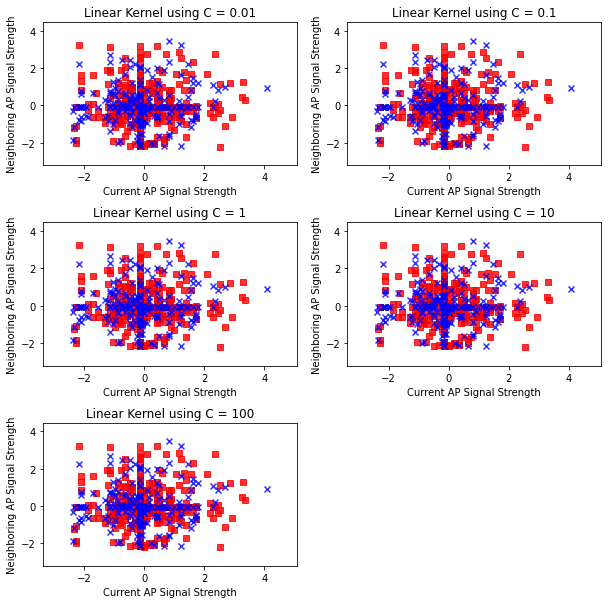

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C_param_range = [0.01,0.1,1,10,100]

signal_acc_table = pd.DataFrame(columns = ['C_parameter', 'Accuracy'])
signal_acc_table['C_parameter'] = C_param_range

plt.figure(figsize=(10,10))
j = 0
for i in C_param_range:
    #Apply SVM model to training data
    svm_linear = SVC(kernel='linear',C=i,random_state = 0)
    svm_linear.fit(X_train_signal_std,y_train_signal)
    
    #predicting using model
    y_pred_signal = svm_linear.predict(X_test_signal_std)
    
    #Saving accuracy score in table
    signal_acc_table.iloc[j,1] = accuracy_score(y_test_signal,y_pred_signal)
    j += 1
    
    #printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_signal_standard,
                         y = Y_combined_signal,
                         classifier = svm_linear,
                         test_idx = range(105,150))
    plt.xlabel('Current AP Signal Strength')
    plt.ylabel('Neighboring AP Signal Strength')
    plt.title('Linear Kernel using C = %s'%i)
    
print(signal_acc_table)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

   C_parameter  Accuracy
0         0.01  0.994709
1         0.10  0.989418
2         1.00  0.994709
3        10.00         1
4       100.00         1


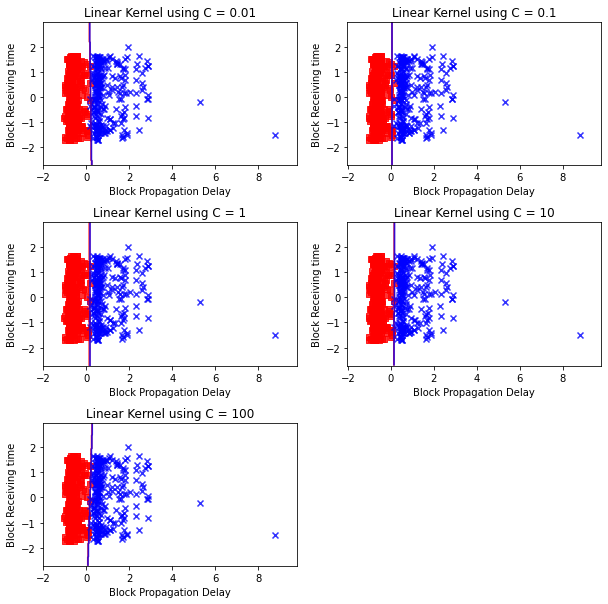

In [7]:
block_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
block_acc_table['C_parameter'] = C_param_range

plt.figure(figsize=(10, 10))

j = 0

for i in C_param_range:
    
    # Apply SVM model to training data
    svm_linear =  SVC(kernel = 'linear', C = i, random_state = 0)
    svm_linear.fit(X_train_block_std,y_train_block)
    
    # Predict using model
    y_pred_block = svm_linear.predict(X_test_block_std)
    
    # Saving accuracy score in table
    block_acc_table.iloc[j,1] = accuracy_score(y_test_block,y_pred_block)
    j += 1
    
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_block_standard
                      , y = Y_combined_block
                      , classifier = svm_linear
                      , test_idx = range(105,150))
    plt.xlabel('Block Propagation Delay')
    plt.ylabel('Block Receiving time')
    plt.title('Linear Kernel using C = %s'%i)
    
print(block_acc_table)

   C_parameter  Train_scores  Test_scores  Difference
0         0.01       0.61244     0.612444   -0.000004
1         0.10       0.61244     0.612444   -0.000004
2         1.00       0.61244     0.612444   -0.000004
3        10.00       0.61244     0.612444   -0.000004
4       100.00       0.61244     0.612444   -0.000004
5      1000.00       0.61244     0.612444   -0.000004
   C_parameter  Train_scores  Test_scores  Difference
0         0.01      0.994818     0.992051    0.002767
1         0.10      0.989234     0.990438   -0.001204
2         1.00      0.995216     0.995225   -0.000009
3        10.00      0.997210     0.996813    0.000397
4       100.00      0.998405     0.995238    0.003167
5      1000.00      0.998804     0.993625    0.005179


(0.0, 1.0)

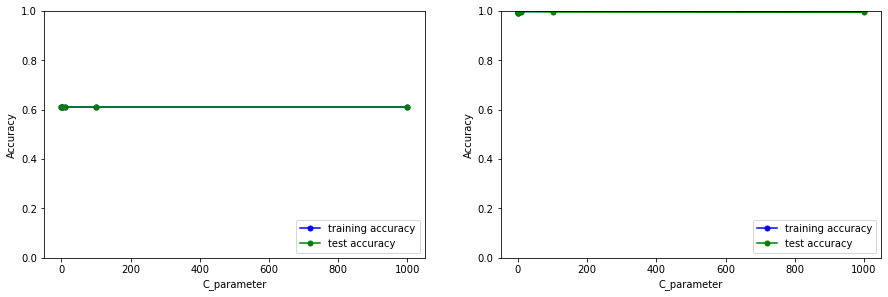

In [8]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

C_param_range = [0.01,0.1,1,10,100,1000]
plt.figure(figsize=(15, 10))

# SIGNAL Plot validation curve
train_signal_scores, test_signal_scores = validation_curve(estimator=svm_linear
                                                            ,X=X_combined_signal_standard
                                                            ,y=Y_combined_signal
                                                            ,param_name='C'
                                                            ,param_range=C_param_range
                                                            ,scoring='accuracy'
                                                            )
train_signal_mean = np.mean(train_signal_scores,axis=1)
train_signal_std = np.std(train_signal_scores,axis=1)
test_signal_mean = np.mean(test_signal_scores,axis=1)
test_signal_std = np.std(test_signal_scores,axis=1)

best_C_table_signal = pd.DataFrame(columns = ['C_parameter','Train_scores','Test_scores','Difference'])
best_C_table_signal['C_parameter'] = C_param_range
best_C_table_signal['Train_scores'] = train_signal_mean
best_C_table_signal['Test_scores'] = test_signal_mean
best_C_table_signal['Difference'] = best_C_table_signal['Train_scores'] - best_C_table_signal['Test_scores']

print(best_C_table_signal)

plt.subplot(2,2,1)
plt.plot(C_param_range
            ,train_signal_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot(C_param_range
            ,test_signal_mean
            ,color='green'
            ,marker='o'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0,1])

# Block Plot validation curve
train_block_scores, test_block_scores = validation_curve(estimator=svm_linear
                                                            ,X=X_combined_block_standard
                                                            ,y=Y_combined_block
                                                            ,param_name='C'
                                                            ,param_range=C_param_range
                                                            ,scoring='accuracy'
                                                            )


train_block_mean = np.mean(train_block_scores,axis=1)
train_block_std = np.std(train_block_scores,axis=1)
test_block_mean = np.mean(test_block_scores,axis=1)
test_block_std = np.std(test_block_scores,axis=1)

best_C_table_block = pd.DataFrame(columns = ['C_parameter','Train_scores','Test_scores','Difference'])
best_C_table_block['C_parameter'] = C_param_range
best_C_table_block['Train_scores'] = train_block_mean
best_C_table_block['Test_scores'] = test_block_mean
best_C_table_block['Difference'] = best_C_table_block['Train_scores'] - best_C_table_block['Test_scores']

print(best_C_table_block)

plt.subplot(2,2,2)
plt.plot(C_param_range
            ,train_block_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot(C_param_range
            ,test_block_mean
            ,color='green'
            ,marker='o'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0,1])

<ipython-input-4-d1a4d9f554d8>:21: UserWarning: No contour levels were found within the data range.
  plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
<ipython-input-4-d1a4d9f554d8>:21: UserWarning: No contour levels were found within the data range.
  plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
*c* argument looks like a single numeric RGB or RGBA sequenc

   degree  Accuracy
0       1  0.597884
1       2  0.597884
2       3  0.597884
3       4  0.597884
4       5  0.597884
5       6  0.597884


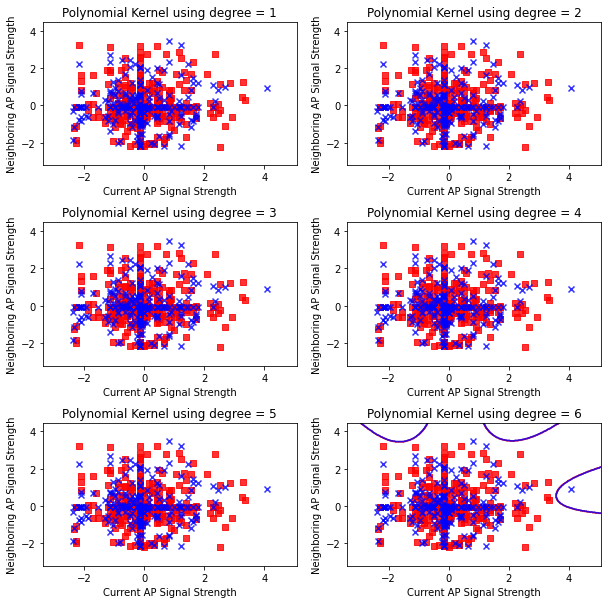

In [14]:
#SVM with polynomial kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
polynomial_degree_range = [1,2,3,4,5,6]
signal_acc_table = pd.DataFrame(columns = ['degree','Accuracy'])
signal_acc_table['degree'] = polynomial_degree_range

plt.figure(figsize=(10,10))
j =0
for i in polynomial_degree_range:
    #Apply SVM model to training data
    svm_poly = SVC(kernel='poly',degree= i,C=1,random_state =0)
    svm_poly.fit(X_train_signal_std,y_train_signal)
    
    #Predict using model
    y_pred_signal = svm_poly.predict(X_test_signal_std)
    
    #Saving accuracy score in the table
    signal_acc_table.iloc[j,1] = accuracy_score(y_test_signal,y_pred_signal)
    j += 1
    
    #Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_signal_standard
                      , y = Y_combined_signal
                      , classifier = svm_poly
                      )
    plt.xlabel('Current AP Signal Strength')
    plt.ylabel('Neighboring AP Signal Strength')
    plt.title('Polynomial Kernel using degree = %s'%i)
    
print(signal_acc_table)
    

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

   degree  Accuracy
0       1  0.994709
1       2  0.714286
2       3  0.941799
3       4  0.714286
4       5   0.84127
5       6  0.714286


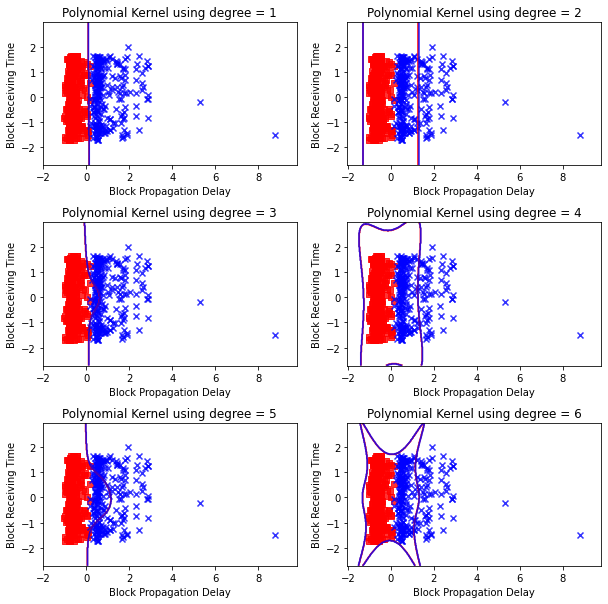

In [15]:
polynomial_degree_range = [1,2,3,4,5,6] 

block_acc_table = pd.DataFrame(columns = ['degree','Accuracy'])
block_acc_table['degree'] = polynomial_degree_range

plt.figure(figsize=(10, 10))

j = 0

for i in polynomial_degree_range:
    
    # Apply SVM model to training data
    svm_poly =  SVC(kernel = 'poly', degree = i, C = 1, random_state = 0)
    svm_poly.fit(X_train_block_std,y_train_block)
    
    # Predict using model
    y_pred_block = svm_poly.predict(X_test_block_std)
    
    # Saving accuracy score in table
    block_acc_table.iloc[j,1] = accuracy_score(y_test_block,y_pred_block)
    j += 1
    
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_block_standard
                      , y = Y_combined_block
                      , classifier = svm_poly
                      , test_idx = range(105,150))
    plt.xlabel('Block Propagation Delay')
    plt.ylabel('Block Receiving Time')
    plt.title('Polynomial Kernel using degree = %s'%i)
    
print(block_acc_table)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

   degree  Accuracy
0       1  0.603175
1       2  0.603175
2       3  0.603175
3       4  0.603175
4       5  0.603175
5       6  0.603175


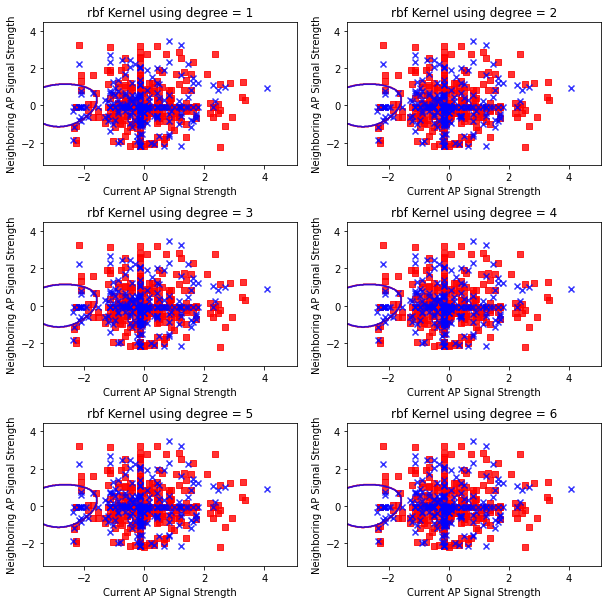

In [16]:
#SVM with RBF(Radial Basis function) kernel
rbf_degree_range = [1,2,3,4,5,6]

signal_acc_table = pd.DataFrame(columns = ['degree','Accuracy'])
signal_acc_table['degree'] = rbf_degree_range

plt.figure(figsize=(10,10))

j = 0
for i in rbf_degree_range:
    #Apply SVM model to training data
    svm_rbf = SVC(kernel='rbf',degree= i, C= 1, random_state=0)
    svm_rbf.fit(X_train_signal_std,y_train_signal)
    
    #Predict using model
    y_pred_signal = svm_rbf.predict(X_test_signal_std)
    
    #Saving accuracy score in table
    signal_acc_table.iloc[j,1]= accuracy_score(y_test_signal,y_pred_signal)
    j += 1
    
    #Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_signal_standard
                      , y = Y_combined_signal
                      , classifier = svm_rbf
                      )
    plt.xlabel('Current AP Signal Strength')
    plt.ylabel('Neighboring AP Signal Strength')
    plt.title('rbf Kernel using degree = %s'%i)
    
print(signal_acc_table)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

   degree  Accuracy
0       1  0.994709
1       2  0.994709
2       3  0.994709
3       4  0.994709
4       5  0.994709
5       6  0.994709


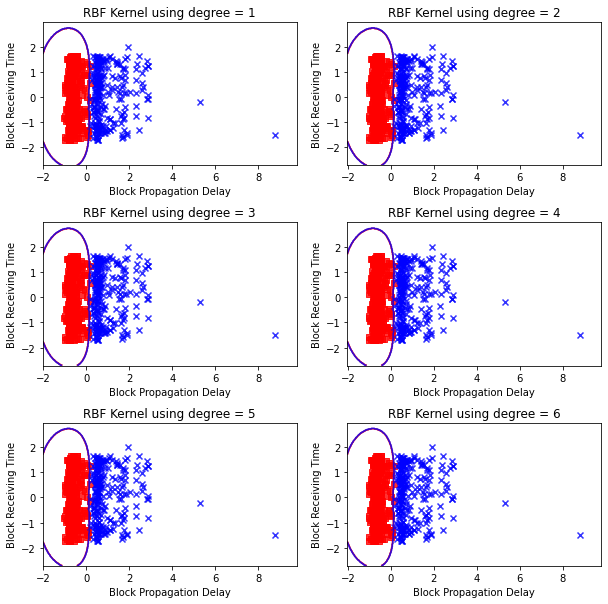

In [17]:
rbf_degree_range = [1,2,3,4,5,6] 

block_acc_table = pd.DataFrame(columns = ['degree','Accuracy'])
block_acc_table['degree'] = rbf_degree_range



plt.figure(figsize=(10, 10))

j = 0

for i in rbf_degree_range:
    
    # Apply SVM model to training data
    svm_rbf =  SVC(kernel = 'rbf', degree = i, C = 1, random_state = 0)
    svm_rbf.fit(X_train_block_std,y_train_block)
    
    # Predict using model
    y_pred_block = svm_rbf.predict(X_test_block_std)
    
    # Saving accuracy score in table
    block_acc_table.iloc[j,1] = accuracy_score(y_test_block,y_pred_block)
    j += 1
    
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_block_standard
                      , y = Y_combined_block
                      , classifier = svm_rbf
                      , test_idx = range(105,150))
    plt.xlabel('Block Propagation Delay')
    plt.ylabel('Block Receiving Time')
    plt.title('RBF Kernel using degree = %s'%i)
    
print(block_acc_table)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset = pd.read_csv('/home/inlab/Downloads/trainINLAB.csv')
X = dataset.iloc[:, [0, 3]].values
y = dataset.iloc[:, 5].values
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))
X = scaler.fit_transform(X)

Shape of X:(627, 2)
Shape of y:(627,)


In [23]:
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

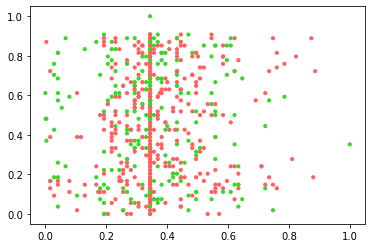

In [24]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

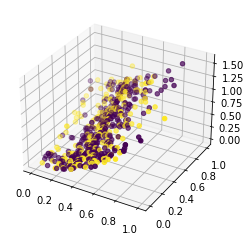

In [25]:
# adding a new dimension to X 
X1 = X[:, 0].reshape((-1, 1)) 
X2 = X[:, 1].reshape((-1, 1)) 
X3 = (X1**2 + X2**2) 
#X3 = X[:, 2].reshape((-1, 1)) 
X = np.hstack((X, X3)) 

# visualizing data in higher dimension 
fig = plt.figure() 
axes = fig.add_subplot(111, projection = '3d')
axes.scatter(X1, X2, X3, c = y, depthshade = True) 
#axes.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True) 
plt.show() 


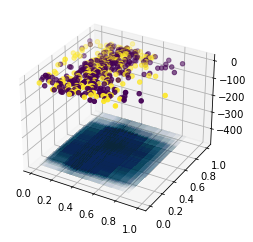

In [26]:
# create support vector classifier using a linear kernel 
from sklearn import svm 

svc = svm.SVC(kernel = 'linear') 
svc.fit(X, y) 
w = svc.coef_ 
b = svc.intercept_ 

# plotting the separating hyperplane 
x1 = X[:, 0].reshape((-1, 1)) 
x2 = X[:, 1].reshape((-1, 1)) 
x1, x2 = np.meshgrid(x1, x2) 
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2] 

fig = plt.figure() 
axes2 = fig.add_subplot(111, projection = '3d') 
axes2.scatter(X1, X2, X1**2 + X2**2, c = y, depthshade = True) 
axes1 = fig.gca(projection = '3d') 
axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
plt.show() 
